In [110]:
#Importing necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
%matplotlib inline

In [3]:
#Read schema data
df_info = pd.read_csv('./Data/survey_results_schema.csv')

In [4]:
#Take a look at the schema data
df_info.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [5]:
#Read survey data
df = pd.read_csv('./Data/survey_results_public.csv')

In [6]:
#Take a look at the survey data
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


### 1. Which countries embrace work from home most?
To answer this question, I will
1. Look at HomeRemote and Country column
2. Calculate the proporition of work from home respondents for each country
3. Create a bar plot to show the results

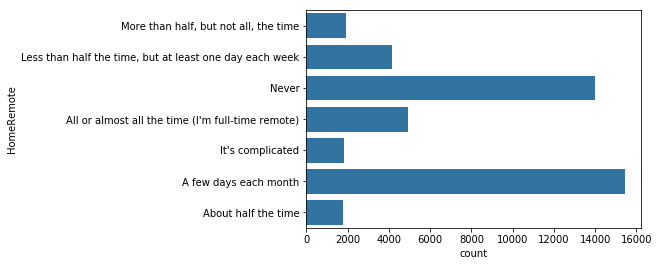

In [8]:
sns.countplot(data = df, y = 'HomeRemote', color=sns.color_palette()[0]);

In [9]:
#Drop the row if it has NaN in HomeRemote or Country column
df_wfh = df.dropna(axis=0, subset=['Country', "HomeRemote"])

In [10]:
df_wfh.shape

(44008, 154)

In [11]:
#Drop the row if it has It's complicated in HomeRemote
df_wfh = df_wfh[df_wfh['HomeRemote'] != "It's complicated"]

In [12]:
df_wfh['HomeRemote'].unique()

array(['More than half, but not all, the time',
       'Less than half the time, but at least one day each week', 'Never',
       "All or almost all the time (I'm full-time remote)",
       'A few days each month', 'About half the time'], dtype=object)

In [13]:
#Drop the rows if the country has less than 300 respondents
country_count = df_wfh['Country'].value_counts()
country_count = country_count[country_count>=300]
country_keep = list(country_count.index)

In [14]:
df_wfh = df_wfh[df_wfh['Country'].isin(country_keep)]

In [15]:
#Add a new column to indicate whether the respondent work from home
df_wfh['WorkFromHome'] =  df_wfh['HomeRemote'].isin (['About half the time', 
                                                     "All or almost all the time (I'm full-time remote)",
                                                     "More than half, but not all, the time",
                                                     "Less than half the time, but at least one day each week"])

In [16]:
country_wfh = df_wfh.groupby(['Country'])['WorkFromHome'].mean().sort_values(ascending = False)

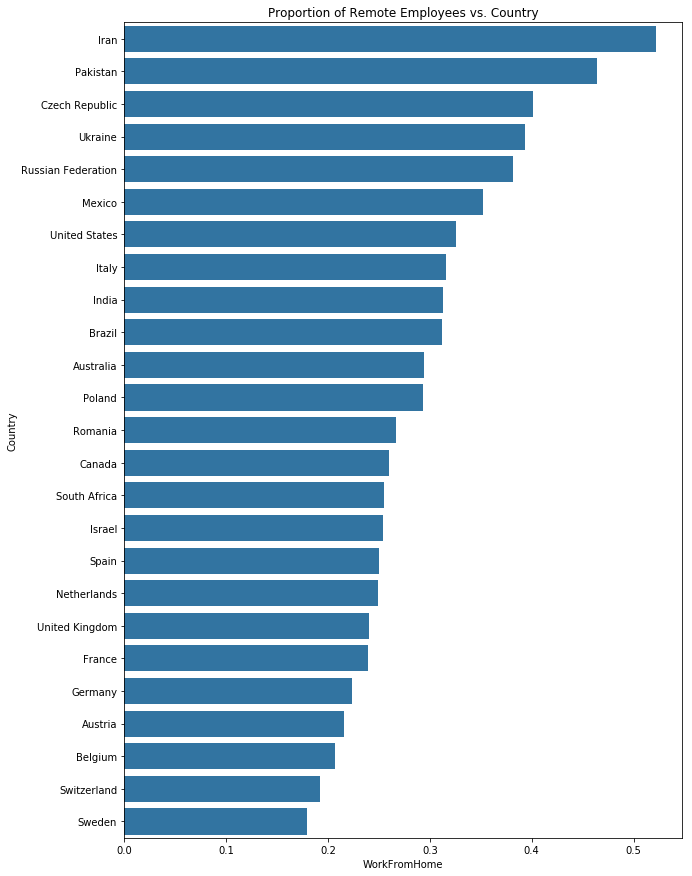

In [17]:
plt.figure(figsize=[10,15])
sns.barplot(y=country_wfh.index, x=country_wfh, color=sns.color_palette()[0])
plt.title("Proportion of Remote Employees vs. Country");

In [18]:
df_wfh['WorkFromHome'].mean()

0.28938963284203123

### Conclusion
Work from home is more popular for developers in these countries: Iran, Pakistan, Czech Replubic, Ukraine, and Russian Federation.

### 2. Does Work From Home impact job satisfication?
To answer this question, I will
1. Look at WokFromHome and JobSatisfaction column
2. Perform hypothesis test for the two groups, i.e. work from home and not work from home, on the average Job Satisfaction score.

**Null Hypothesis:** The average Job Satisfcation difference between the Work From Home employee and Non Work From Home is equal to zero.

**Alternative Hypothesis:** There is a difference in Job Satisfcation between the two groups

In [19]:
# Drop rows with nan values in JobSatisfaction column
df_wfh_js = df_wfh.dropna(subset=['JobSatisfaction'])
df_wfh_js = df_wfh_js[['Respondent','JobSatisfaction', 'WorkFromHome']]

In [20]:
df_wfh_js['JobSatisfaction'].mean()

6.997317322432294

In [21]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df_wfh_js.shape[0]
for _ in range(5000):
    b_samp = df_wfh_js.sample(size, replace=True)
    wfh_df = b_samp.query('WorkFromHome == 1')
    not_wfh_df = b_samp.query('WorkFromHome == 0')
    wfh_js = wfh_df['JobSatisfaction'].mean()
    not_wfh_js = not_wfh_df['JobSatisfaction'].mean()
    diffs.append(wfh_js - not_wfh_js)

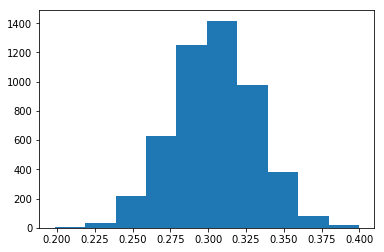

In [22]:
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs);

In [23]:
# Calculate the observed difference on average Job Satisfaction rating between the two groups
js_wfh = df_wfh_js.query('WorkFromHome == 1')['JobSatisfaction'].mean()
js_not_wfh = df_wfh_js.query('WorkFromHome == 0')['JobSatisfaction'].mean()
obs_diff = js_wfh - js_not_wfh

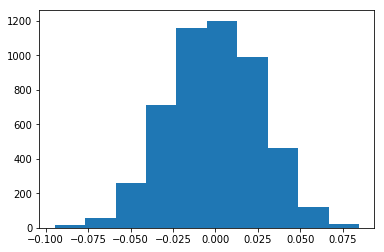

In [24]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals);

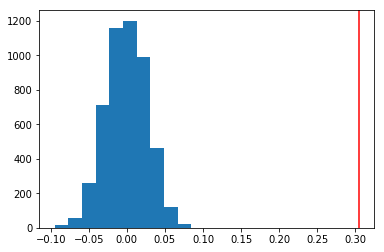

In [25]:
# Plot observed statistic with the null distibution
plt.hist(null_vals)
plt.axvline(obs_diff, c='red');

In [26]:
# Compute p-value
(null_vals > obs_diff).mean()

0.0

### Conclusion
Since p-value is almost equal to 0, the null hypothesis can be rejected. It can be concluded that the average Job Satisfaction Rating of work from home employees is significantly higher than that of non work from home employees.

### 3. How likely is a developer to be working from home, considering the characteristics of both the employer and employee?


In [190]:
# Only select resopondents who are currently employeed
df_wfh = df_wfh[df_wfh['EmploymentStatus'].isin(['Employed part-time', 
                                                 'Employed full-time', 
                                                 'Independent contractor, freelancer, or self-employed'])]

In [191]:
# Select a subset of columns for this analysis
df_wfh_data = df_wfh[['WorkFromHome', 'Country', 'CompanySize', 'CompanyType', 
                      'JobSecurity', 'SeriousWork', 'HoursPerWeek', 'DifficultCommunication', 
                      'CollaborateRemote', 'EmploymentStatus']]

In [192]:
# Converting CompanySize to numerical
df_wfh_data = df_wfh_data.replace({'CompanySize': {'Fewer than 10 employees': 1, 
                                                   '10 to 19 employees': 2,
                                                  '20 to 99 employees': 3,
                                                  '100 to 499 employees': 4,
                                                  '500 to 999 employees': 5,
                                                  '1,000 to 4,999 employees': 6,
                                                  '5,000 to 9,999 employees': 7,
                                                  '10,000 or more employees': 8,
                                                  "I don't know": np.nan,
                                                  'I prefer not to answer': np.nan}})

In [193]:
# Clean up CompanyType data
df_wfh_data = df_wfh_data.replace({'CompanyType': {"I don't know": 'other',
                                                  'I prefer not to answer': 'other',
                                                  'Something else': 'other',
                                                   np.nan: 'other'}})

In [194]:
# Converting to numerical
df_wfh_data = df_wfh_data.replace({'Strongly disagree': 1, 
                                   'Disagree': 2,
                                   'Somewhat agree': 3,
                                   'Agree': 4,
                                   'Strongly agree': 5,})

In [195]:
# Fill NaN with median for each column
df_wfh_data = df_wfh_data.fillna(df_wfh_data.median())

In [196]:
# Drop NaN if there is still any
df_wfh_data = df_wfh_data.dropna()

In [197]:
# Split the data into features and target label
features_raw = df_wfh_data.drop('WorkFromHome', axis = 1)
target = df_wfh_data['WorkFromHome']

In [198]:
features_final = pd.get_dummies(features_raw)

In [199]:
# Split the 'features' and 'target' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 5)

In [200]:
def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    learner = learner.fit(X_train, y_train)
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
        
    # Return the results
    return results

In [201]:
dt_model = tree.DecisionTreeClassifier(random_state=0)
train_predict(dt_model, X_train, y_train, X_test, y_test)

{'acc_train': 0.8866666666666667, 'acc_test': 0.6910902696365768}

In [202]:
lg_model = LogisticRegression(random_state=0)
train_predict(lg_model, X_train, y_train, X_test, y_test)

{'acc_train': 0.78, 'acc_test': 0.766559202813599}

In [206]:
coefficients = pd.concat([pd.DataFrame({'Feature': features_final.columns}),
                          pd.DataFrame(np.transpose(lg_model.coef_))], axis = 1)

In [207]:
coefficients.rename(columns={0:'Coeficient'}, inplace=True)

In [214]:
coefficients.sort_values(by=['Coeficient'], ascending=False)

,Feature,Coeficient
42,"EmploymentStatus_Independent contractor, freel...",1.736051
20,Country_Pakistan,0.786751
15,Country_Iran,0.774419
28,Country_Ukraine,0.504455
23,Country_Russian Federation,0.492138
30,Country_United States,0.479229
11,Country_Czech Republic,0.430755
14,Country_India,0.338187
31,CompanyType_Government agency or public school...,0.304290
32,CompanyType_Non-profit/non-governmental organi...,0.258925


In [209]:
type(features_final.columns)

pandas.core.indexes.base.Index

In [210]:
type(np.transpose(lg_model.coef_))

numpy.ndarray

In [212]:
features_raw['EmploymentStatus'].value_counts()

Employed full-time                                      27894
Independent contractor, freelancer, or self-employed     3775
Employed part-time                                       2448
Name: EmploymentStatus, dtype: int64